In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from statsmodels.tsa.stattools import acf
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

In [3]:
data =  pd.read_csv('../../../Data/pv_power_df_5day_capacity_scaled.csv', index_col='datetime')#.drop(columns=['2657', '2828']) #DROPPING FAULTY SYSTEMS
uk_pv = pd.read_csv('../../../Data/system_metadata_location_rounded.csv')
uk_pv['ss_id_string'] = uk_pv['ss_id'].astype('str')

## Analysis
- Plot time series, ACF, PACF

<AxesSubplot:xlabel='datetime'>

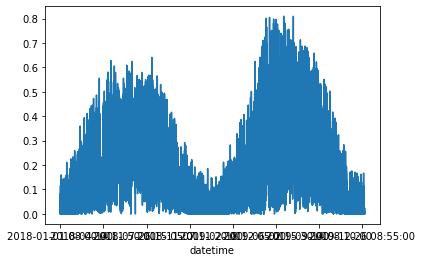

In [5]:
ts = data.iloc[:,0]
ts.plot()

Text(0, 0.5, 'Autocorrelation')

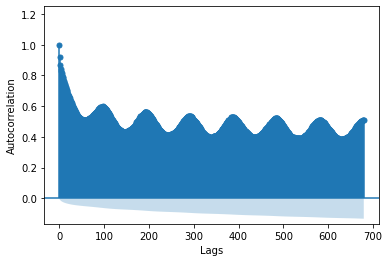

In [14]:
plot_acf(ts, lags = 97 * 7, title='', auto_ylims=True)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

This is the clear pattern of a $SARIMA(1,0,0)\times(1,0,0)_{97}$

Text(0, 0.5, 'Autocorrelation')

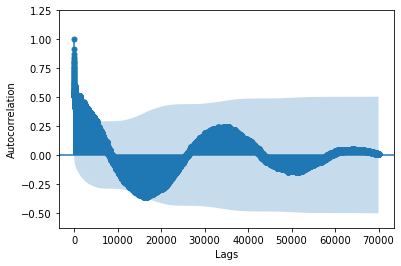

In [8]:
plot_acf(ts, lags = 70000, title='', auto_ylims=True)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')


/Users/SeanNassimiha/miniforge3/envs/mscjax_dev/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


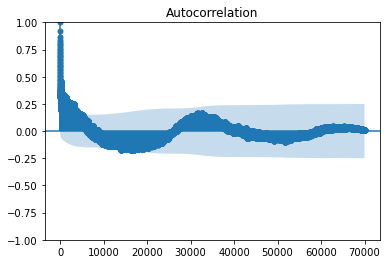

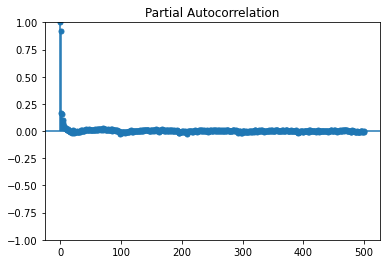

In [67]:
plot_acf(ts, lags = 70000, title='', auto_ylims=True)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')


In [ ]:
plot_pacf(ts, lags = 500, title='', auto_ylims=True);

This shows the possible presence of a yearly component as well

So clearly we need to take the diff!

# Lag 1 diff

/Users/SeanNassimiha/miniforge3/envs/mscjax_dev/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


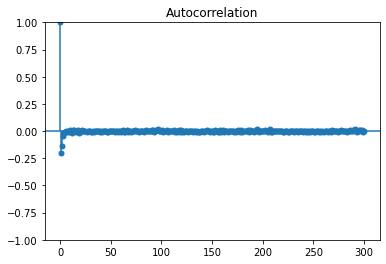

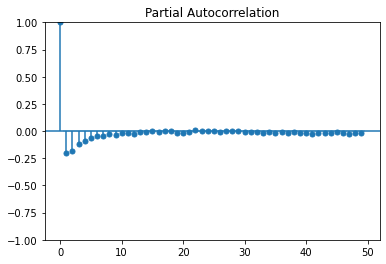

In [96]:
plot_acf(ts.diff().dropna(), lags = 300, alpha = 0.05 );
plot_pacf(ts.diff().dropna());

# Taking the daily diff

<AxesSubplot:xlabel='datetime'>

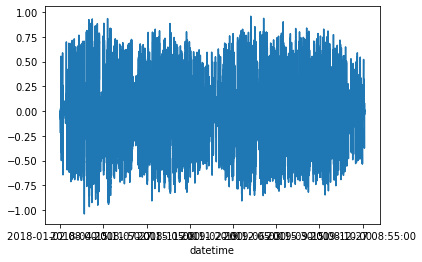

In [58]:
ts_daily_diff = ts.diff(97).dropna()
ts_daily_diff.plot()

/Users/SeanNassimiha/miniforge3/envs/mscjax_dev/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


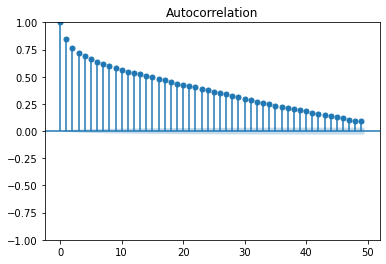

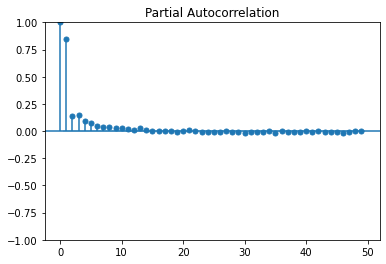

In [97]:
plot_acf(ts_daily_diff, alpha = 0.05);
plot_pacf(ts_daily_diff);

So it still has autoregressive component!

# Take lag 1 and lag 97 diff

<AxesSubplot:xlabel='datetime'>

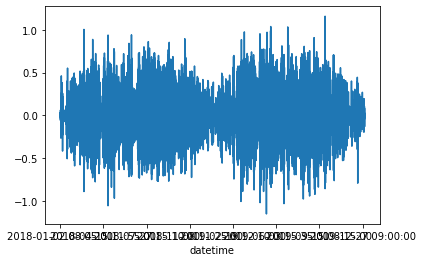

In [64]:
ts_1_97 = ts.diff(97).diff(1).dropna()
ts_1_97.plot()

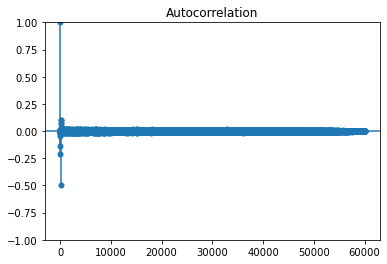

In [98]:
plot_acf(ts_1_97, lags=60000, alpha = 0.05);


/Users/SeanNassimiha/miniforge3/envs/mscjax_dev/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


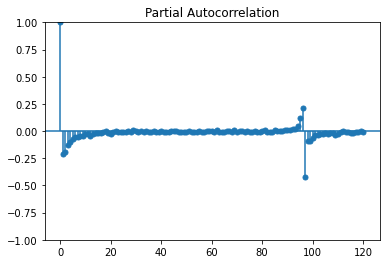

In [99]:
plot_pacf(ts_1_97, lags=120, alpha = 0.05);

<AxesSubplot:xlabel='datetime'>

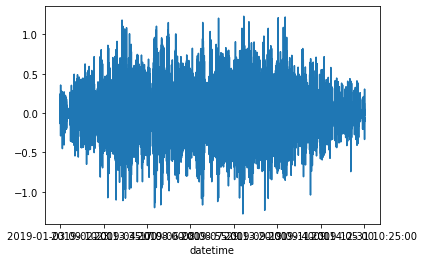

In [84]:
ts_yearly_and_daily_diff = ts.diff(1).diff(97).diff(97*365).dropna()
ts_yearly_and_daily_diff.plot()

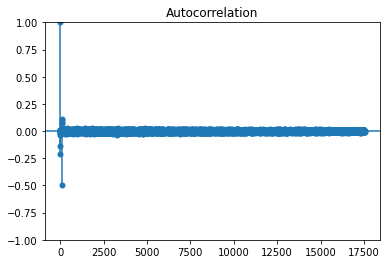

In [90]:
plot_acf(ts_yearly_and_daily_diff, lags=17533);


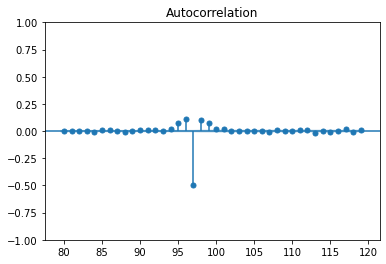

In [100]:
plot_acf(ts_yearly_and_daily_diff, lags=np.arange(80, 120), alpha = 0.05);


/Users/SeanNassimiha/miniforge3/envs/mscjax_dev/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


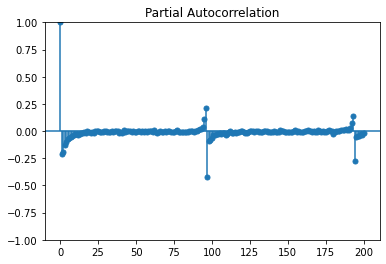

In [92]:
plot_pacf(ts_yearly_and_daily_diff, lags = 200);

## Models to try

- I will try out an SARIMA( 1,1 , 0)X( 1,1 ,0 )_97
- I will try out an SARIMA( 1,1 , 1)X( 1,1 ,0 )_97
- I will try out an SARIMA( 1,1 , 0)X( 1,1 ,0 )_97_year
- I will try out an SARIMA( 1,1 , 1)X( 1,1 ,0 )_97_year

In [110]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# tscv = TimeSeriesSplit(n_splits = 10, test_size = 24)
# x = ts[:10000]

# for train_index, test_index in tscv.split(x):
#     X_train, X_test = x[train_index], x[test_index]
#     print(f'X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}')
    

X_train.shape: (9760,), X_test.shape: (24,)
X_train.shape: (9784,), X_test.shape: (24,)
X_train.shape: (9808,), X_test.shape: (24,)
X_train.shape: (9832,), X_test.shape: (24,)
X_train.shape: (9856,), X_test.shape: (24,)
X_train.shape: (9880,), X_test.shape: (24,)
X_train.shape: (9904,), X_test.shape: (24,)
X_train.shape: (9928,), X_test.shape: (24,)
X_train.shape: (9952,), X_test.shape: (24,)
X_train.shape: (9976,), X_test.shape: (24,)


In [114]:
# model_1 = SARIMAX(ts[:1000], order = (1,1, 0), seasonal_order=(1,1,0,97))
# fit = model_1.fit(full_output = 0)
# fit.summary()
# fit.predict()

/Users/SeanNassimiha/miniforge3/envs/mscjax_dev/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/SeanNassimiha/miniforge3/envs/mscjax_dev/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36425D+00    |proj g|=  3.31682D+00

At iterate    5    f= -1.37738D+00    |proj g|=  2.69587D-01

At iterate   10    f= -1.37748D+00    |proj g|=  8.46381D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     34      1     0     0   2.809D-04  -1.377D+00
  F =  -1.3774850535226846     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


# Try with PMArima

In [ ]:
#USING CODE FROM https://alkaline-ml.com/pmdarima/auto_examples/model_selection/example_cross_validati

import pmdarima as pm
from pmdarima import model_selection

print("pmdarima version: %s" % pm.__version__)

# Load the data and split it into separate pieces
train, test = model_selection.train_test_split(ts.values, train_size = 10000)

# Even though we have a dedicated train/test split, we can (and should) still
# use cross-validation on our training set to get a good estimate of the model
# performance. We can choose which model is better based on how it performs
# over various folds.
model1 = pm.ARIMA(order = (1,1, 0), seasonal_order=(1,1,0,97))
model2 = pm.ARIMA(order = (1,1, 1), seasonal_order=(1,1,0,97))
model3 = pm.ARIMA(order = (1,1, 1), seasonal_order=(1,1,0,97))

cv = model_selection.RollingForecastCV(h=24, step = 200, initial = 5000)

model1_cv_scores = model_selection.cross_val_score(
    model1, train, scoring='mean_absolute_error', cv=cv, verbose=2)

model2_cv_scores = model_selection.cross_val_score(
    model2, train, scoring='mean_absolute_error', cv=cv, verbose=2)

model3_cv_scores = model_selection.cross_val_score(
    model3, train, scoring='mean_absolute_error', cv=cv, verbose=2)

print("Model 1 CV scores: {}".format(model1_cv_scores.tolist()))
print("Model 2 CV scores: {}".format(model2_cv_scores.tolist()))

# Pick based on which has a lower mean error rate
m1_average_error = np.average(model1_cv_scores)
m2_average_error = np.average(model2_cv_scores)
errors = [m1_average_error, m2_average_error]
models = [model1, model2]

# print out the answer
better_index = np.argmin(errors)  # type: int
print("Lowest average SMAPE: {} (model{})".format(
    errors[better_index], better_index + 1))
print("Best model: {}".format(models[better_index]))

pmdarima version: 1.8.5
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................
[CV] fold=9 ..........................................................
[CV] fold=10 .........................................................


# End PMarima

In [ ]:
def VARMA_model(train,test):
    # fit model
    model = VARMAX(train, order=(1, 2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.forecast(steps=len(test))
    res=pd.DataFrame({"Pred1":yhat['Act1'], "Pred2":yhat['Act2'], 
                      "Act1":test["Act1"].values, "Act2":test["Act2"].values})
    return res

In [ ]:
data_reduced = data.iloc[:2000, :10]
X = data_reduced.values

In [ ]:
for train_index, test_index in tscv.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    print(X_train.shape,X_test.shape )
#     df_ret = VARMA_model(X_train, X_test)
